# Question 2 Part 2

## Description

Read messi and barbara image, apply gaussian and salt&pepper noise to them next try to reduce noise using wavelete haar transform.

## Import required dependencies

- Import cv2 for read and map the color channels
- Import pywt to apply wavelete haar transform
- Import numpy to work with arrays
- Import matplotlib to show image for each step
- Import random_noise to apply salt and pepper noise

In [13]:
import cv2
import pywt
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise

## Read Image

In [14]:
messi_image = cv2.imread("../images/messi5.jpg")
barbara_image = cv2.imread("../images/barbara.tif")

# Convert BGR order to RGB
messi_image = cv2.cvtColor(messi_image, cv2.COLOR_BGR2RGB)
barbara_image = cv2.cvtColor(barbara_image, cv2.COLOR_BGR2RGB)

## Apply noise to images

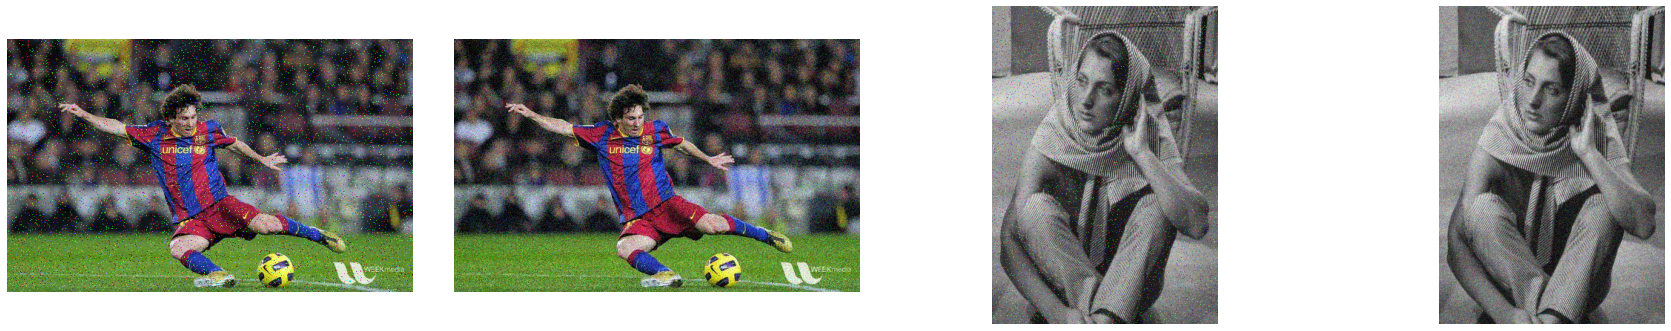

In [15]:
sp_noised_messi = random_noise(messi_image, mode="s&p")
gaussian_noised_messi = random_noise(messi_image, mode="gaussian")

sp_noised_barbara = random_noise(barbara_image, mode="s&p")
gaussian_noised_barbara = random_noise(barbara_image, mode="gaussian")

f, subplt = plt.subplots(1,4,figsize=(25,5))
plt.tight_layout()
subplt[0].axis('off')
subplt[0].imshow(sp_noised_messi)
subplt[1].axis('off')
subplt[1].imshow(gaussian_noised_messi)
subplt[2].axis('off')
subplt[2].imshow(sp_noised_barbara)
subplt[3].axis('off')
subplt[3].imshow(gaussian_noised_barbara)

## Define function to compare images with mse and psnr

In [16]:
def mse(image_1, image_2):
    return ((image_1 - image_2) ** 2).sum() / \
        (image_1.shape[0] * image_1.shape[1])


def psnr(image_1, image_2):
    mse_value = mse(image_1, image_2)
    return 10 * np.log((255**2) / mse_value)


def compare(image_1, image_2):
    mse_value = mse(image_1, image_2)
    psnr_value = psnr(image_1, image_2)
    print("MSE: {:.2f} PSNR: {:.2f}".format(mse_value, psnr_value))

## Defind function to process image

In [17]:
def applyWaveleteHaarTransform(threshold, image):
    image_height, image_width, channels = image.shape

    result = np.copy(image)

    for c in range(channels):
        LL1, (LH1, HL1, HH1) = pywt.dwt2(result[:, :, c], "haar")

        LH1 *= LH1 > threshold
        HL1 *= HL1 > threshold
        HH1 *= HH1 > threshold

        result[:, :, c] = pywt.idwt2((LL1, (LH1, HL1, HH1)), "haar")

    print('Threshold: {}'.format(threshold))
    compare(image, result)

    return result

## Getting Start

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Salt & Pepper Messi:
Threshold: 0.5
MSE: 0.04 PSNR: 143.94
Threshold: 0
MSE: 0.02 PSNR: 150.39
Threshold: -0.5
MSE: 0.00 PSNR: 173.70

Gaussian Messi:
Threshold: 0.5
MSE: 0.02 PSNR: 148.30
Threshold: 0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


MSE: 0.01 PSNR: 155.10
Threshold: -0.5
MSE: 0.00 PSNR: 198.09

Salt & Pepper Barbara:
Threshold: 0.5
MSE: 0.04 PSNR: 143.03
Threshold: 0
MSE: 0.02 PSNR: 149.44
Threshold: -0.5
MSE: 0.00 PSNR: 172.77


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



Gaussian Barbara:
Threshold: 0.5
MSE: 0.03 PSNR: 145.35
Threshold: 0
MSE: 0.02 PSNR: 152.14
Threshold: -0.5
MSE: 0.00 PSNR: 186.20


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


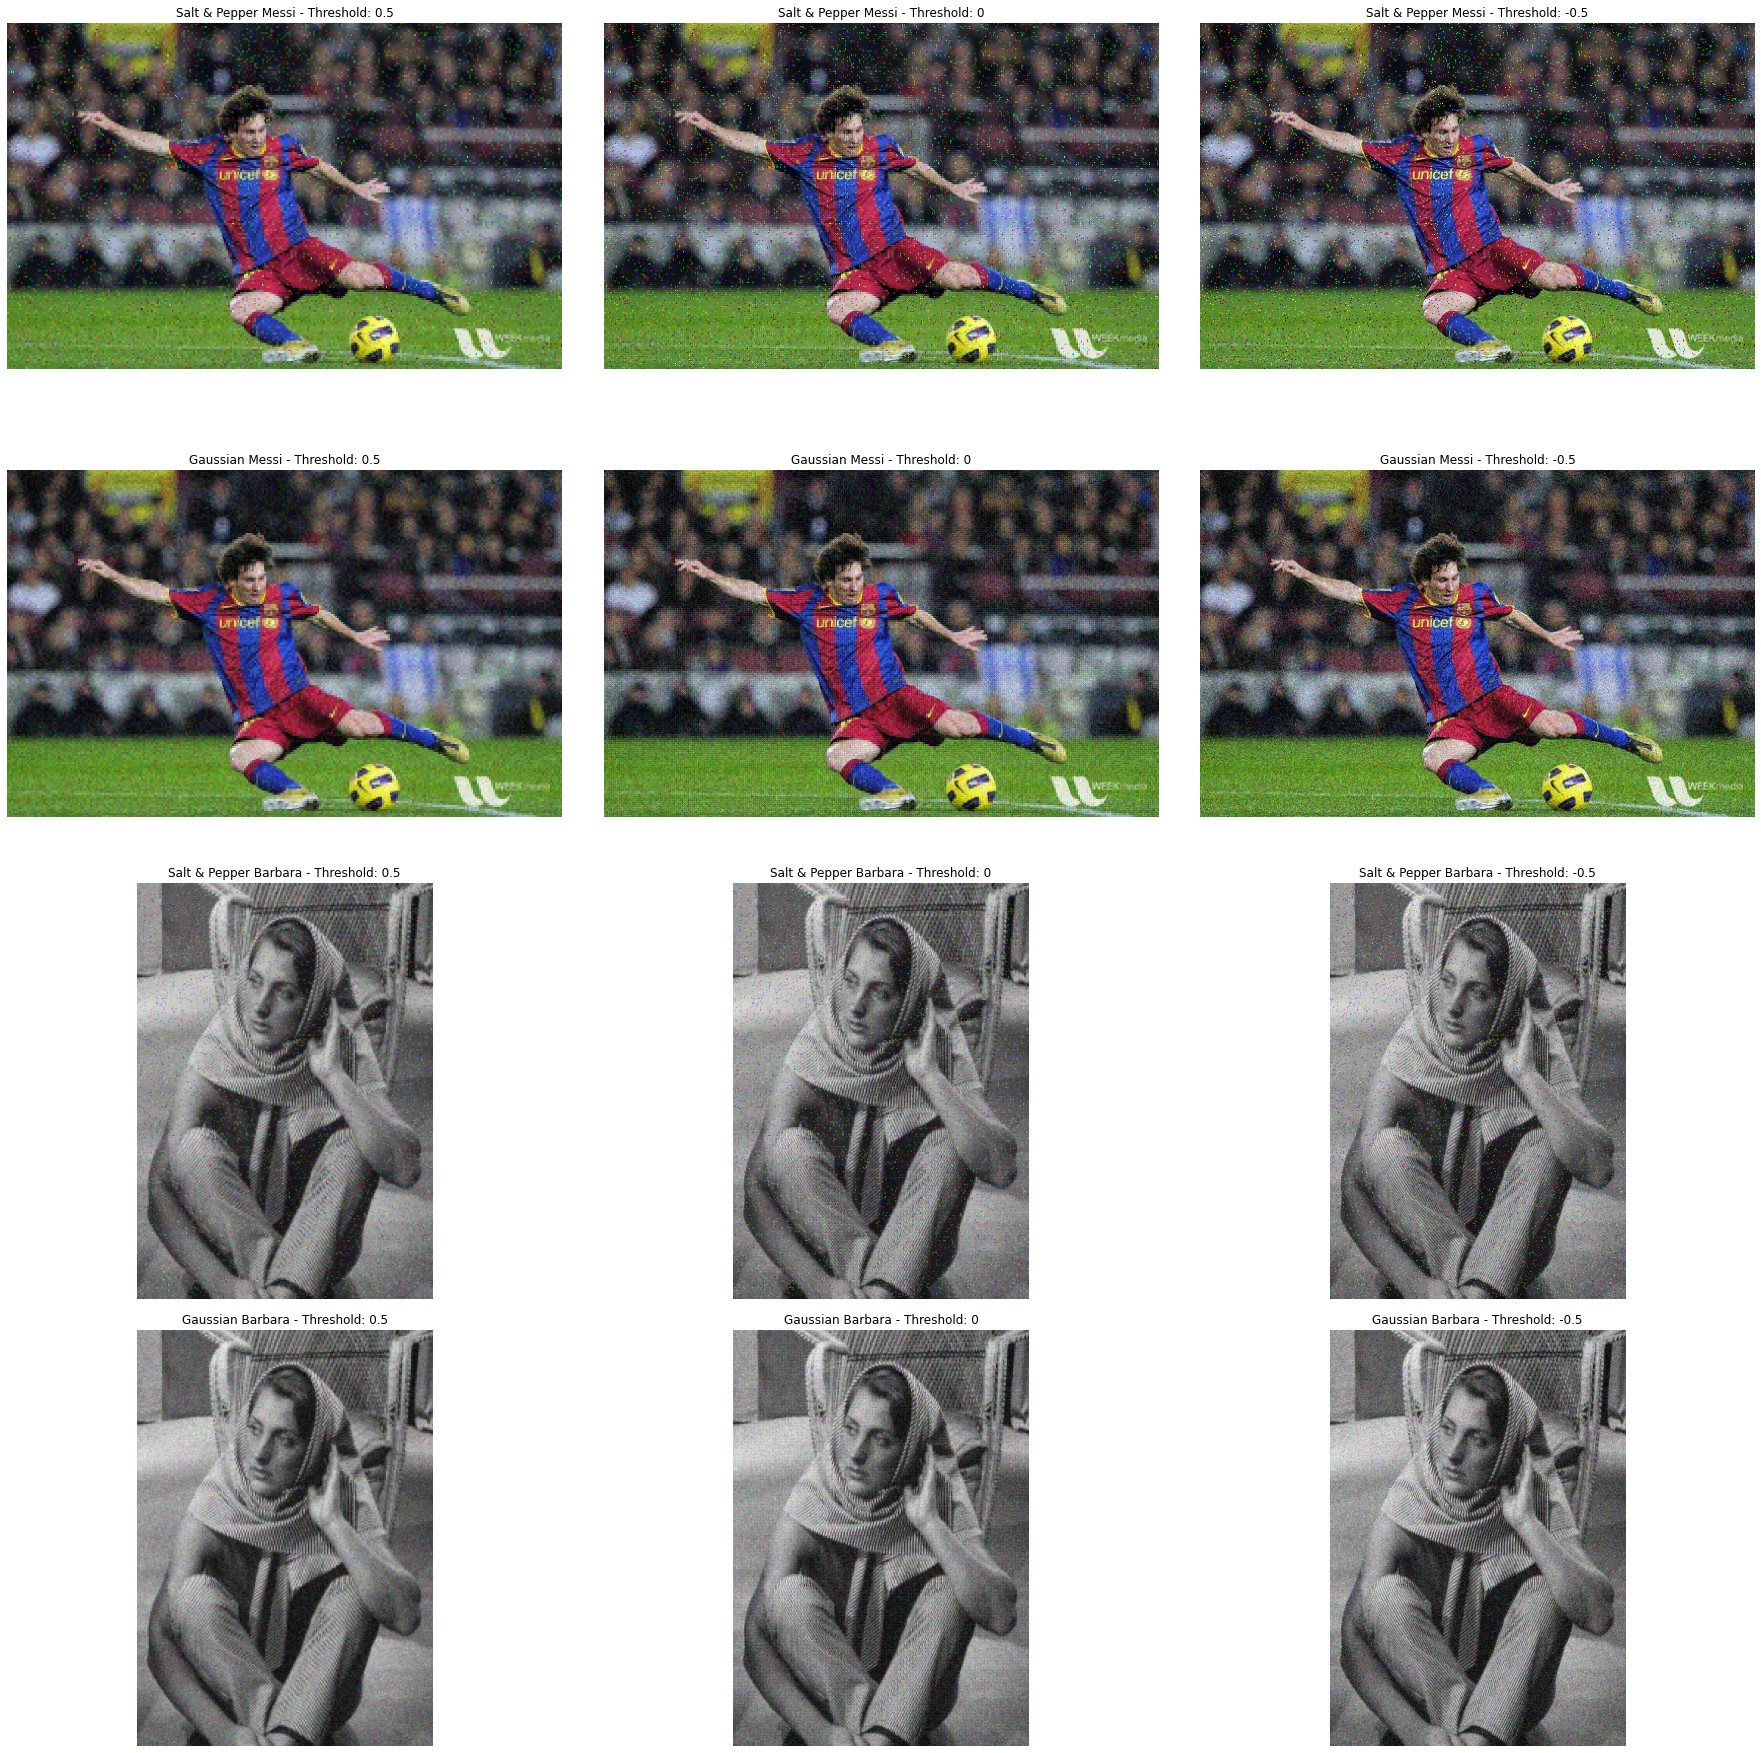

In [18]:
f, subplt = plt.subplots(4, 3, figsize=(25, 25))
plt.tight_layout()

thresholds = [0.5, 0, -0.5]

i = 0
print("Salt & Pepper Messi:")
for threshold in thresholds:
    result = applyWaveleteHaarTransform(threshold, sp_noised_messi)
    subplt[0][i].axis('off')
    subplt[0][i].imshow(result)
    subplt[0][i].set_title(
        'Salt & Pepper Messi - Threshold: {}'.format(threshold))
    i += 1
print()
i = 0
print("Gaussian Messi:")
for threshold in thresholds:
    result = applyWaveleteHaarTransform(threshold, gaussian_noised_messi)
    subplt[1][i].axis('off')
    subplt[1][i].imshow(result)
    subplt[1][i].set_title('Gaussian Messi - Threshold: {}'.format(threshold))
    i += 1
print()
i = 0
print("Salt & Pepper Barbara:")
for threshold in thresholds:
    result = applyWaveleteHaarTransform(threshold, sp_noised_barbara)
    subplt[2][i].axis('off')
    subplt[2][i].imshow(result)
    subplt[2][i].set_title(
        'Salt & Pepper Barbara - Threshold: {}'.format(threshold))
    i += 1
print()
i = 0
print("Gaussian Barbara:")
for threshold in thresholds:
    result = applyWaveleteHaarTransform(threshold, gaussian_noised_barbara)
    subplt[3][i].axis('off')
    subplt[3][i].imshow(result)
    subplt[3][i].set_title(
        'Gaussian Barbara - Threshold: {}'.format(threshold))
    i += 1

As result, according to the results wavelete haar transform has better result rather than dtc transform for reducing noises